Accuracy: 97.85%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.84      0.91       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



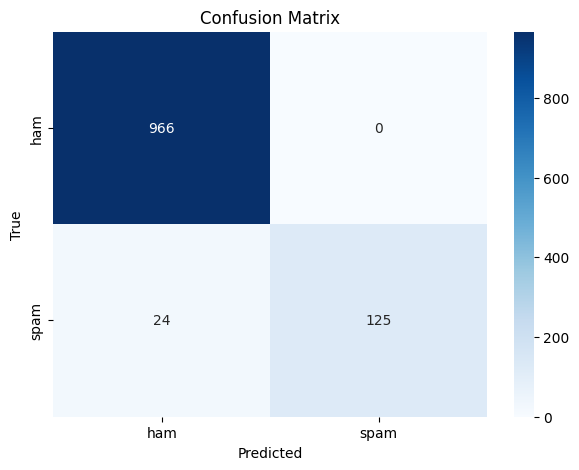

Message: 'Free money! Claim your reward now' => Predicted: Spam
Message: 'Hey, how are you?' => Predicted: Ham


In [ ]:

# Step 1: Import Required Libraries
import pandas as pd
import io
!pip install requests
import requests
import zipfile

# Step 2: Load the Dataset
# You can download the dataset from UCI repository if it's not available
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip"

response = requests.get (url)
response.raise_for_status()

with zipfile.ZipFile(io.BytesIO(response.content)) as zip_file:
  with zip_file.open('SMSSpamCollection') as file:
    dataset = pd.read_csv(file,sep='\t',header=None, names=["label","message"])


# Step 3: Preprocessing the Data
# Convert labels to binary: spam = 1, ham = 0
dataset['label'] = dataset['label'].map({'ham': 0, 'spam': 1})

# Split the dataset into features (X) and target labels (y)
X = dataset['message']
y = dataset['label']

# Step 4: Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = vectorizer.transform(X_test)

# Step 6: Train the Naive Bayes model
model = MultinomialNB()

# Train the model on the training data
model.fit(X_train_tfidf, y_train)

# Step 7: Make Predictions on the Test Data
y_pred = model.predict(X_test_tfidf)

# Step 8: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Step 9: Display Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 10: Display Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Step 11: Test with New Messages
new_messages = ["Free money! Claim your reward now", "Hey, how are you?"]

# Convert new messages into TF-IDF format
new_messages_tfidf = vectorizer.transform(new_messages)

# Predict whether the new messages are spam or ham
new_predictions = model.predict(new_messages_tfidf)

for message, pred in zip(new_messages, new_predictions):
    print(f"Message: '{message}' => Predicted: {'Spam' if pred == 1 else 'Ham'}")

